## Logistic regression

#### Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### <h2 style="color:purple">Data exploration and visualization</h2>

In [7]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
left = df[df.left==1]
left.shape

(3571, 10)

In [10]:
retained = df[df.left==0]
retained.shape

(11428, 10)

#### **Average numbers for all columns** 

In [106]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### **Impact of salary on employee retention**

<AxesSubplot:xlabel='salary'>

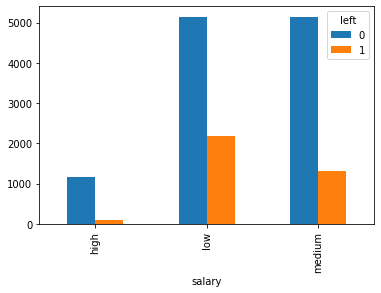

In [107]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

#### **Department wise employee retention rate**

<AxesSubplot:xlabel='Department'>

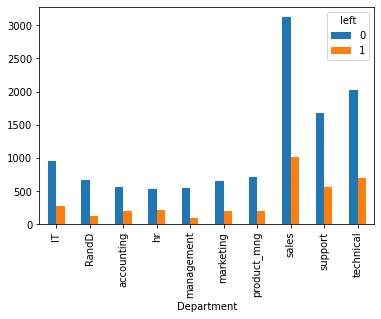

In [108]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [109]:
df.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

<AxesSubplot:xlabel='time_spend_company'>

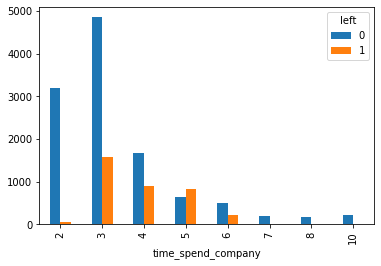

In [110]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

In [111]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [112]:
df1 = df[['satisfaction_level', 'last_evaluation','average_montly_hours',
       'promotion_last_5years', 'salary']]

#### **Tackle salary dummy variable**

In [113]:
salary_dummies = pd.get_dummies(df1.salary, prefix_sep = 'salary')

In [114]:
df_with_dummies = pd.concat([df1,salary_dummies], axis=1)

In [115]:
df_with_dummies.drop('salary',axis=1, inplace=True)

In [116]:
df_with_dummies.head()

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,0.53,157,0,0,1,0
1,0.80,0.86,262,0,0,0,1
2,0.11,0.88,272,0,0,0,1
3,0.72,0.87,223,0,0,1,0
4,0.37,0.52,159,0,0,1,0


In [117]:
from sklearn.preprocessing import StandardScaler

df_scale = pd.DataFrame(StandardScaler().fit_transform(df_with_dummies), columns = df_with_dummies.columns)

In [118]:
df_scale.head()

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,high,low,medium
0,-0.936495,-1.087275,-0.882040,-0.147412,-0.299809,1.024775,-0.868132
1,0.752814,0.840707,1.220423,-0.147412,-0.299809,-0.975824,1.151898
2,-2.022479,0.957554,1.420657,-0.147412,-0.299809,-0.975824,1.151898
3,0.431041,0.899131,0.439508,-0.147412,-0.299809,1.024775,-0.868132
4,-0.976716,-1.145699,-0.841993,-0.147412,-0.299809,1.024775,-0.868132


In [119]:
X = df_scale

In [120]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,high,low,medium
14634,-0.856051,-1.496241,-1.162368,-0.147412,3.335461,-0.975824,-0.868132
5209,0.511484,-0.327767,-0.481571,-0.147412,-0.299809,1.024775,-0.868132
14415,1.034366,1.074402,1.060235,-0.147412,-0.299809,1.024775,-0.868132
345,-2.062701,0.840707,1.540798,-0.147412,3.335461,-0.975824,-0.868132
8935,1.034366,0.373317,-1.182392,-0.147412,-0.299809,-0.975824,1.151898
...,...,...,...,...,...,...,...
9086,0.270155,0.022775,1.460704,-0.147412,-0.299809,-0.975824,1.151898
12153,-0.856051,-1.145699,-0.922087,-0.147412,-0.299809,1.024775,-0.868132
13153,-1.821371,0.607012,0.019016,6.783716,-0.299809,-0.975824,1.151898
3986,-0.775608,0.198046,-0.761899,-0.147412,-0.299809,1.024775,-0.868132


In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()

In [124]:
model.fit(X_train,y_train)

LogisticRegression()

In [125]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### **Accuracy of the model**

In [126]:
model.score(X_test,y_test)

0.77